# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [3]:
df.shape

(1863, 14)

## Linear Regression Model

In [4]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [5]:
# separate input features in x
x = df.drop("price", axis=1)

# store the target variable in y
y = df["price"]

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [6]:
# import module train test split
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=df['property_type_Condo'], random_state = 42)

In [7]:
# train your model
lrmodel = LinearRegression().fit(x_train,y_train)

In [8]:
# make predictions on test set
ypred = lrmodel.predict(x_test)

In [9]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, ypred)

In [10]:
#evaluate the model
print('Test error is', test_mae)

Test error is 88310.50005449496


In [12]:
# make predictions on train set
xpred = lrmodel.predict(x_train)

In [13]:
train_mae = mean_absolute_error(y_train, xpred)

In [14]:
train_mae

86059.35949241265

## Decision Trees

In [15]:
#import the libraries, in this case reggresor
from sklearn.tree import DecisionTreeRegressor

In [86]:
#create an instance of the model
dt = DecisionTreeRegressor(max_depth = 8, max_features=10)

In [87]:
#train the model
dtmodel = dt.fit(x_train, y_train)

In [88]:
#make predictions on the test set
dt_ypred = dtmodel.predict(x_test)

In [89]:
test_mae_dt = mean_absolute_error(y_test, dt_ypred)
test_mae_dt

60590.440378776904

In [95]:
# check the mean square error also in the train set

dt_train_ypred = dtmodel.predict(x_train)
test_mae_dt_train = mean_absolute_error(y_train, dt_train_ypred)
test_mae_dt_train

34498.21017621438

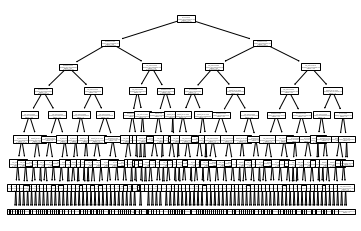

In [96]:
# plot the tree
from sklearn import tree

#plot the tree with feature names
tree.plot_tree(dtmodel, feature_names =dtmodel.feature_names_in_)

#save the plot to a file
plt.savefig('tree.png', dpi=300)


## Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
#create an instance of the model
rf = RandomForestRegressor(n_estimators=50, criterion='absolute_error')

In [126]:
#train the model 
rfmodel = rf.fit(x_train, y_train) 

In [127]:
# make predictions
rf_ypred = rfmodel.predict(x_test)

In [128]:
# evaluate
test_mae_rf = mean_absolute_error(y_test, rf_ypred)
test_mae_rf

48441.39525469169

## Pickle:

In [131]:
import pickle

In [132]:
#for exporting the model as file
pickle.dump(rfmodel, open('RF_Model', 'wb')) # RF_model = name of the file, wb means binary form

In [133]:
#for importing the model
Model = pickle.load(open('RF_Model', 'rb'))

In [153]:
Model.predict(df.loc[0:0,df.columns != 'price'])

#Model.predict([[2013, 234, 81, 1, 1, 584, 2013, 0, 0, 0, 1, 0,1]]) #same as the loc on top

array([308555.3])